# Sparks Foundation Grip Task-6  

## Prediction on Iris dataset using Decision Tree Algorithm 

### Author: Ushba Jamshid

### Step-1 Importing necessary libraries.

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
print("Libraries imported successfully")

Libraries imported successfully


### Step-2 Importing the Dataset. 

In [14]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Step-3 Pre processing of Data.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [21]:
df.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [23]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Checking Null Values in dataset 

In [26]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Step-4 Training the Model. 

In [38]:
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Create features matrix
x = df.loc[:, features].values

In [40]:
y = df.Species

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [44]:
clf = DecisionTreeClassifier(max_depth = 2, random_state = 0)

In [46]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [48]:
clf.predict(x_test[0:1])

array(['Iris-virginica'], dtype=object)

In [52]:
from sklearn import metrics 
import seaborn as sns

In [54]:
score = clf.score(x_test, y_test)
print(score)

0.8947368421052632


In [56]:
print(metrics.classification_report(y_test, clf.predict(x_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.83      0.94      0.88        16
 Iris-virginica       0.86      0.67      0.75         9

       accuracy                           0.89        38
      macro avg       0.90      0.87      0.88        38
   weighted avg       0.90      0.89      0.89        38



### Step-5  Data Visualization

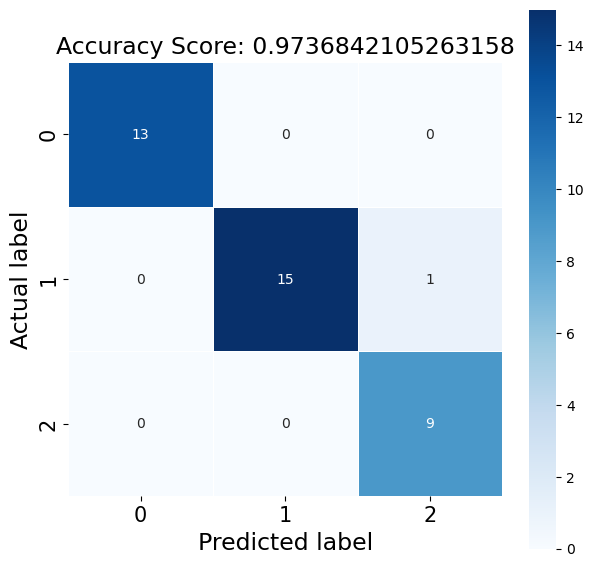

In [63]:
cm = metrics.confusion_matrix(y_test, clf.predict(x_test))

plt.figure(figsize = (7,7))
sns.heatmap(cm, annot = True,
            fmt = ".0f",
            linewidths = .5,
            square = True,
            cmap = 'Blues')
plt.ylabel('Actual label', fontsize = 17)
plt.xlabel('Predicted label', fontsize = 17)
plt.title('Accuracy Score: {}'.format(score), size = 17)
plt.tick_params(labelsize = 15)

In [61]:
# List of values to try for max_depth
max_depth_range = list(range(1,6))

# List to store the average RMSE for each value of max_depth
accuracy= []
for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(x_train, y_train)
    score = clf.score(x_test, y_test)
    accuracy.append(score)

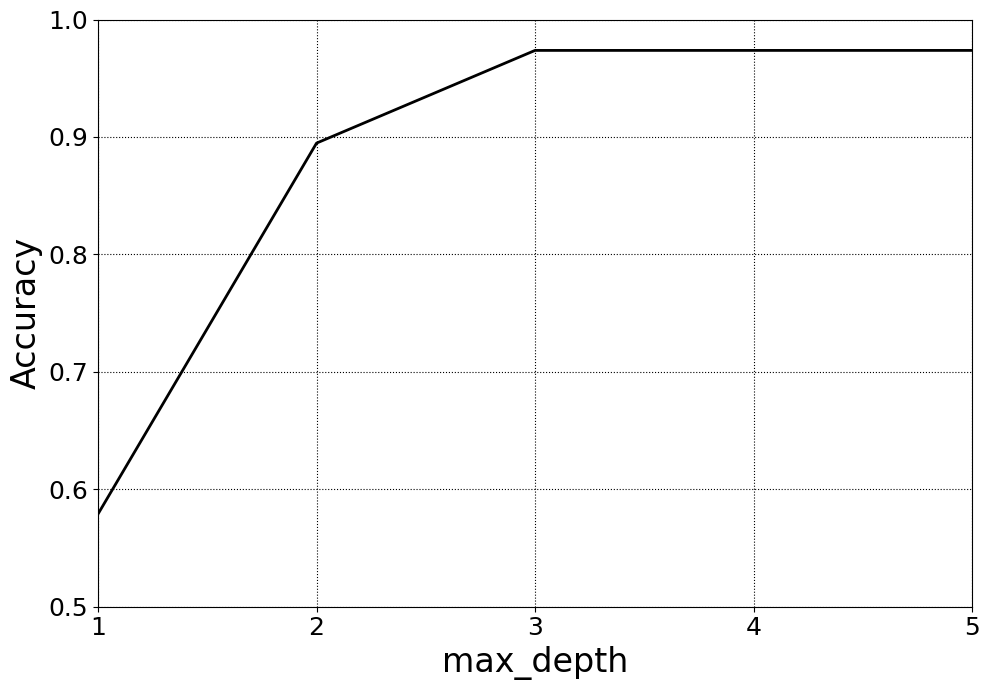

In [65]:
# ploting accuracy score depth wise
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize =(10,7))
ax.plot(max_depth_range, accuracy, lw = 2, color ='k')
ax.set_xlim([1,5])
ax.set_ylim([.50, 1.00])
ax.grid(True, axis = 'both', zorder = 0, linestyle = ':', color = 'k')
ax.tick_params(labelsize = 18)
ax.set_xticks([1,2,3,4,5])
ax.set_xlabel('max_depth', fontsize = 24)
ax.set_ylabel('Accuracy', fontsize = 24)
fig.tight_layout()

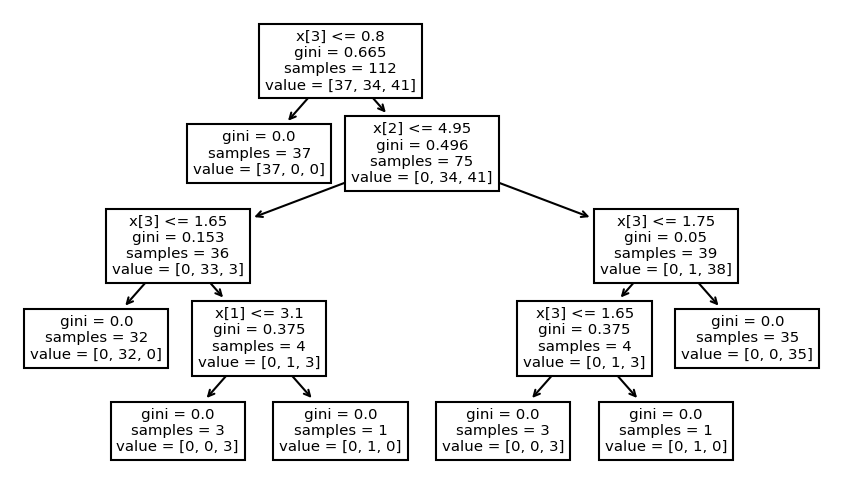

In [69]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (7,4), dpi = 150)
tree.plot_tree(clf)
plt.show()

In [71]:
# putting the feature names and clas names into variables
fn = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petak width (cm)']
cn = ['setosa', 'versicolor', 'virginica']

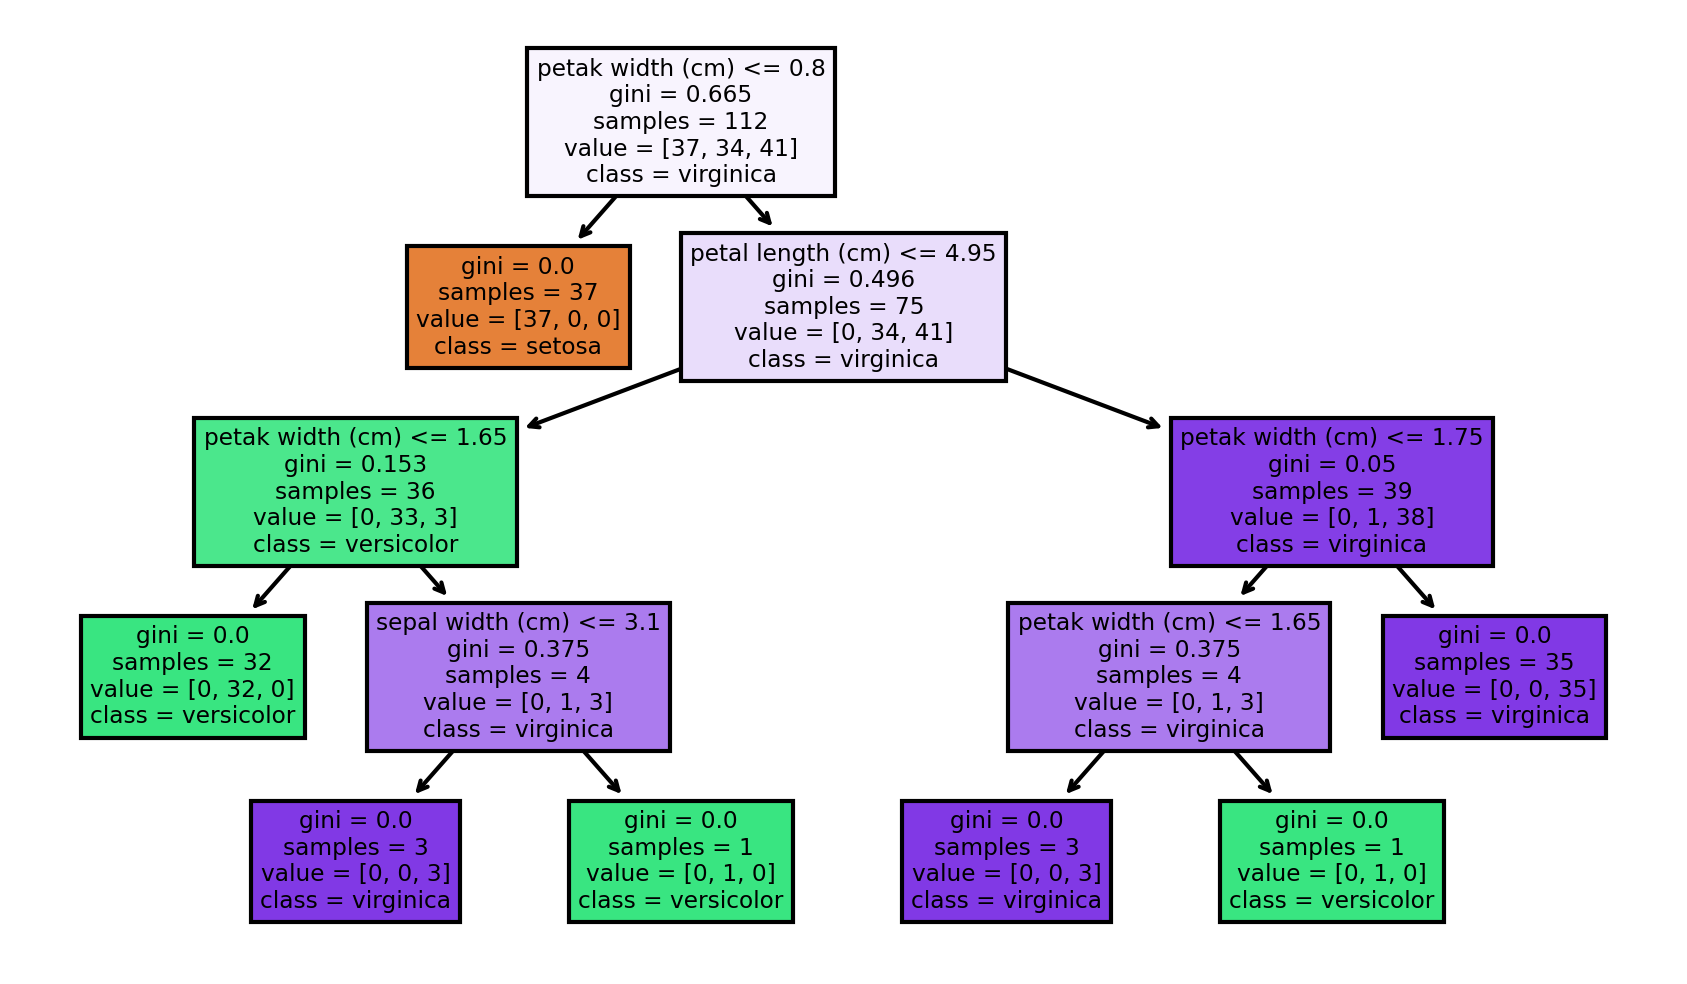

In [75]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (7,4), dpi = 300)
tree.plot_tree(clf, feature_names = fn, class_names = cn, filled = True)
plt.show()

### **Conclusion:**

- After importing data, fit the dataset to the model and the accuracy is 89.47%.
- We can clearly see model performance by confusion matrix and classification report.
- By ploting accuracy score depth wise graph , optimal depth for model is 3.